

**Implementation of KNN classifier using sklearn**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
dt=pd.read_csv("titanic.csv")
dt.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
dt.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [7]:
dt.drop(["Name","Cabin","Ticket","PassengerId","Age","Cabin"],
        axis=1,inplace=True)
dt.dropna(axis=0,inplace=True)

In [9]:
dt.isnull().sum()

Survived    0
Pclass      0
Sex         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [10]:
dt=pd.get_dummies(dt,["Sex","Embarked"])
dt.head()

,Survived,Pclass,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,1,0,7.2500,0,1,0,0,1
1,1,1,1,0,71.2833,1,0,1,0,0
2,1,3,0,0,7.9250,1,0,0,0,1
3,1,1,1,0,53.1000,1,0,0,0,1
4,0,3,0,0,8.0500,0,1,0,0,1


In [13]:
x=dt.drop(["Survived"],axis=1)
y=dt.Survived

<font size="4">**Train Test Split**</font>

In [15]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,
                                               random_state=0,stratify=y)

In [17]:
#standardize the numerical data
from sklearn.preprocessing import StandardScaler
std=StandardScaler()
std.fit(x_train['Fare'].values.reshape(-1,1))
x_train['Fare']=std.transform(x_train['Fare'].values.reshape(-1,1))
x_test['Fare']=std.transform(x_test['Fare'].values.reshape(-1,1))

In [18]:
x_train.head()

,Pclass,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
370,1,1,0,0.452757,0,1,1,0,0
832,3,0,0,-0.483747,0,1,1,0,0
815,1,0,0,-0.624170,0,1,0,0,1
43,2,1,2,0.183485,1,0,1,0,0
376,3,0,0,-0.483343,1,0,0,0,1


<font size="4">**Hyperparameter tuning using GridSearchCV**</font>

In [19]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

param_grid={"n_neighbors":np.arange(1,50)}
knn=KNeighborsClassifier()
knn_cv=GridSearchCV(knn,param_grid,cv=5)
knn_cv.fit(x_train,y_train)

print('Best Score:',str(knn_cv.best_score_))
print("Best Parameters:",str(knn_cv.best_params_))

Best Score: 0.786230670737713
Best Parameters: {'n_neighbors': 14}


<font size="4">**KNN classifier with k=46 neighbors**</font>

In [21]:
#setting up KNN classifier with k=46 neighbors
knn_1=KNeighborsClassifier(46)
knn_1.fit(x_train,y_train)
knn_1.score(x_test,y_test)

0.8314606741573034

<font size="4">**Model performance Analysis**</font>

In [22]:
from sklearn.metrics import confusion_matrix
y_pred=knn_1.predict(x_test)
confusion_matrix(y_test,y_pred)
pd.crosstab(y_test,y_pred, rownames=["True"],colnames=["Predicted"])

Predicted,0,1
True,,
0,97,13
1,17,51


Text(0.5, 12.5, 'Predicted label')

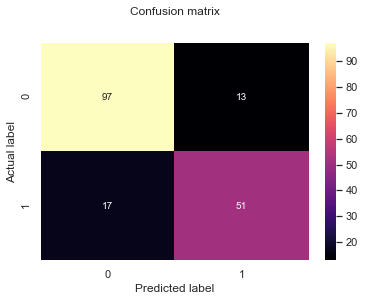

In [25]:
from sklearn import metrics
cnf_matrix=metrics.confusion_matrix(y_test,y_pred)
p=sns.heatmap(pd.DataFrame(cnf_matrix), annot=True,
              cmap='magma',fmt="g")

plt.title("Confusion matrix",y=1.1)
plt.ylabel("Actual label")
plt.xlabel("Predicted label")

In [26]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.88      0.87       110
           1       0.80      0.75      0.77        68

    accuracy                           0.83       178
   macro avg       0.82      0.82      0.82       178
weighted avg       0.83      0.83      0.83       178

